In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [8]:
boston = load_boston()

# Convert to pandas DataFrame
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target

# Display the first few rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

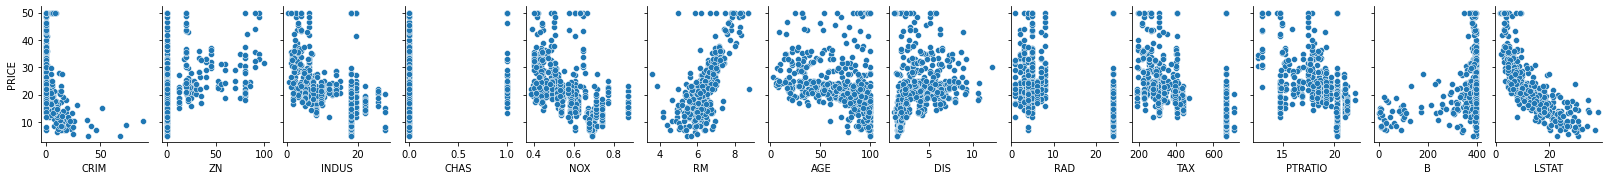

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [9]:
sns.pairplot(data, x_vars=boston.feature_names, y_vars='PRICE', height=2.5, aspect=0.7)
plt.show()

# Check for missing values
data.isnull().sum()


In [15]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression().fit(X_train, y_train)
ln_reg.score(X_test, y_test)

0.684426728352711

In [19]:
ln_reg.score(X_train, y_train)

0.748087259862344

In [48]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1, tol=0.1, max_iter=100)
lasso_model.fit(X_train, y_train)

lasso_model.score(X_test, y_test)

0.6649300271540028

In [54]:
from sklearn.linear_model import Ridge

rg_model = Ridge(alpha=10, tol=0.001, max_iter=100)
rg_model.fit(X_train, y_train)

rg_model.score(X_test, y_test)
y_pred = rg_model.predict(X_test)


y_pred_flat = y_pred.flatten()

# Create a DataFrame to display side by side
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_flat
})

print(results)

     Actual  Predicted
173    23.6  28.415714
274    32.4  35.002157
491    13.6  13.625288
72     22.8  24.931737
452    16.1  19.517248
..      ...        ...
418     8.8   3.427567
117    19.2  23.503712
42     25.3  26.204112
322    20.4  23.595284
347    23.1  25.509196

[127 rows x 2 columns]
